# Calculation of unlensed and lensed rate of detectable events 

## Detectable Unlensed events' rate in a year

In [1]:
import numpy as np
from ler import LeR
import json
import matplotlib.pyplot as plt
%matplotlib inline

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1
/Users/phurailatpamhemantakumar/anaconda3/envs/lal/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [2]:
# check the input and output
# check of examples
# check for methods and attributes
LeR?

Init signature:
LeR(
    nsamples=100000,
    npool=4,
    z_min=0.0,
    z_max=10.0,
    batch_size=25000,
    snr_finder='gwsnr',
    json_file_ler_param='./LeR_params.json',
    **kwargs,
)
Docstring:     
Class to calculate both the rates of lensed and unlensed events.

Parameters
----------
nsamples : `int`
    number of samples for sampling.
    default nsamples = 100000.
npool : `int`
    number of cores to use.
    default npool = 4.
z_min : `float`
    minimum redshift.
    default z_min = 0.
    for popI_II, popIII, primordial, BNS z_min = 0., 5., 5., 0. respectively.
z_max : `float`
    maximum redshift.
    default z_max = 10.
    for popI_II, popIII, primordial, BNS z_max = 10., 40., 40., 2. respectively.
batch_size : `int`
    batch size for SNR calculation.
    default batch_size = 25000.
    reduce the batch size if you are getting memory error.
snr_finder : `str`
    default snr_finder = 'gwsnr'.
    if 'gwsnr', the SNR will be calculated using the gwsnr package.
    i

### Initialization of LeR
* LeR initialize the gwsnr (SNR calculator method)
* LeR initialize CompactBinaryPopulation with its parent class SourceGalaxyPopulationModel
* SourceGalaxyPopulationModel contains methods for compact binary distributions with redshift evolution. CompactBinaryPopulation contains methods for sampling compact binary properties.
* LeR initialize LensGalaxyPopulation for lens properties (with new source params) and image properties.
* Note: CompactBinaryPopulation, SourceGalaxyPopulationModel, LensGalaxyPopulation can also be use seperately as standalone classes according to user's need.

In [3]:
# initialization
# any of input params for CompactBinaryPopulation, SourceGalaxyPopulationModel, LensGalaxyPopulation and gwsnr can be given in LeR initialization
ler = LeR()

Given: IMR waveform, {self.waveform_approximant}.
psds not given. Choosing bilby's default psds
given psds:  {'L1': 'aLIGO_O4_high_asd.txt', 'H1': 'aLIGO_O4_high_asd.txt', 'V1': 'AdV_asd.txt'}
Interpolator will be generated for L1 detector at ./interpolator_pickle/L1/halfSNR_dict_1.pickle
Interpolator will be generated for H1 detector at ./interpolator_pickle/H1/halfSNR_dict_1.pickle
Interpolator will be generated for V1 detector at ./interpolator_pickle/V1/halfSNR_dict_1.pickle
Generating interpolator for ['L1', 'H1', 'V1'] detectors


interpolation for each mass_ratios: 100%|███████████████████████████| 50/50 [00:12<00:00,  3.92it/s]

interpolator generated


In [4]:
# one can check all the input params
# they are all strored in
print(ler.gw_param_sampler_dict)
print(ler.lensed_param_sampler_dict)
print(ler.snr_calculator_dict)

{'nsamples': 100000, 'm_min': 4.59, 'm_max': 86.22, 'z_min': 0.0, 'z_max': 10.0, 'event_type': 'popI_II', 'merger_rate_density_fn': None, 'merger_rate_density_param': None, 'src_model_params': None, 'spin_zero': False}
{'nsamples': 100000, 'min_lensed_images': 2, 'max_lensed_images': 4, 'lensModelList': ['EPL_NUMBA', 'SHEAR']}
{'mtot_min': 2.0, 'mtot_max': 439.6, 'nsamples_mtot': 100, 'nsamples_mass_ratio': 50, 'sampling_frequency': 2048.0, 'waveform_approximant': 'IMRPhenomD', 'minimum_frequency': 20.0, 'snr_type': 'interpolation', 'waveform_inspiral_must_be_above_fmin': False, 'psds': None, 'psd_file': False, 'ifos': None, 'interpolator_dir': './interpolator_pickle'}


### Unlensed param sampling

In [5]:
# looking for input and return values of the unlensed event sampler
ler.unlensed_cbc_statistics?

Signature:
ler.unlensed_cbc_statistics(
    nsamples=None,
    resume=False,
    json_file='./gw_params.json',
    **kwargs,
)
Docstring:
Function to generate unlensed GW source parameters.

Parameters
----------
nsamples : `int`
    number of samples.
    default nsamples = 100000.
resume : `bool`
    resume = False (default) or True.
    if True, the function will resume from the last batch.
json_file : `str`
    json file name for storing the parameters.
    default json_file = './gw_params.json'.
kwargs : `dict`
    key word arguments for initializing the ``CompactBinaryPopulation`` class. 

    This initialization is either done at the time of class initialization or at the time of calling this function. 

    Following parameters can be provided, 

    ``m_min`` : `float`
        minimum mass of the compact binary (single).
    ``m_max`` : `float`
        maximum mass of the compact binary (single).
    ``event_type`` : `str`
        event_type = 'popI_II' or `popIII` or `primord

In [7]:
# sampling unlensed events
# Note: you can change params and reinitialized CompactBinaryPopulation, SourceGalaxyPopulationModel, Lens in this method
# sampled params are stored in './gw_params.json', you can change the path in this method
# you can also use ler.gw_param = "default" to retrieve the sampled params as method
# ler.batch_size = 25000
ler.unlensed_cbc_statistics(nsamples=100000);

chosen batch size = 25000. If you want to change batch size, self.batch_size = new_size
There will be 4 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
Batch no. 2
sampling gw source params...
calculating snrs...
Batch no. 3
sampling gw source params...
calculating snrs...
Batch no. 4
sampling gw source params...
calculating snrs...


In [8]:
ler.unlensed_rate?

Signature:
ler.unlensed_rate(
    gw_param='./gw_params.json',
    snr_threshold=8.0,
    jsonfile='./gw_params_detectable.json',
    detectability_condition='step_function',
)
Docstring:
Function to calculate unlensed merger rate.

.. math::
    R_U = \mathcal{N}^U\int dz_s R_o^U(z_s)\bigg\{\Theta[\rho(z_s,\theta)-\rho_{th}] P(\theta) d\theta \bigg\}

- where :math:`\mathcal{N}^U` is the normalization factor of the unlensed merger rate distribution wrt redshift.

Parameters
----------
gw_param : `dict` or `str` for json file name.
    dictionary of unlensed GW source parameters.
    default gw_param = './gw_params.json'.
snr_threshold : `float`
    SNR threshold for detection.
    default snr_threshold = 8.
jsonfile : `str`
    json file name for storing the detectable parameters.
    default jsonfile = './gw_params_detectable.json'.

Returns
----------
unlensed_rate : (`float`,`float`)
    unlensed merger rate in a year
    unlensed_rate[0] = total unlensed rate with step function
  

In [10]:
# rate calculation
# use either use step funtion or pdet for selecting detectable events. Default: step function
# sampled params (detectable) are stored in './gw_params_detectable.json'. You can change the path in this method
# you can also use ler.gw_param_detectable = "default" to retrieve the detectable params as method
ler.unlensed_rate();

getting gw_params from json file ./gw_params.json...
total unlensed rate (yr^-1) (with step function): 737.0527443966921
storing detectable unlensed params in ./gw_params_detectable.json


* remember that absolute value of of rate will inherit errors from the local merger rate
* what matters is the ratio of unlensed and lensed events

In [14]:
# looking at the detectable events
ler.gw_param_detectable='default'
print(ler.gw_param_detectable.keys())
# save moemory
ler.gw_param_detectable=None

dict_keys(['mass_1', 'mass_2', 'mass_1_source', 'mass_2_source', 'zs', 'luminosity_distance', 'iota', 'psi', 'phase', 'geocent_time', 'ra', 'dec', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'opt_snr_net', 'L1', 'H1', 'V1'])


## Detectable lensed events' rate in a year

In [16]:
# looking at input and return params oof lensed event sampler
ler.lensed_cbc_statistics?

Signature:
ler.lensed_cbc_statistics(
    nsamples=None,
    resume=False,
    json_file='./lensed_params.json',
    **kwargs,
)
Docstring:
Function to generate lensed GW source parameters, lens galaxy parameters and image paramters.

Parameters
----------
nsamples : `int`
    number of samples.
    default nsamples = 100000.
resume : `bool`
    resume = False (default) or True.
    if True, the function will resume from the last batch.
json_file : `str`
    json file name for storing the parameters.
    default json_file = './lensed_params.json'.
kwargs : `dict`
    key word arguments for initializing the ``LensGalaxyPopulation`` class. 

    This initialization is either done at the time of class initialization or at the time of calling this function. 

    Following parameters can be provided, 

    ``min_lensed_images`` : `int`
        minimum number of lensed images.
    ``max_lensed_images`` : `int`
        maximum number of lensed images.
    ``lensModelList`` : `list`
        l

In [17]:
# sampling lens parameters and image(s) parameters
# Note: you can change params and reinitialized CompactBinaryPopulation, SourceGalaxyPopulationModel, LensGalaxyPopulation in this method
# ler.batch_size = 25000
ler.lensed_cbc_statistics(nsamples=100000);

chosen batch size = 25000. If you want to change batch size, self.batch_size = new_size
There will be 4 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 25000/25000 [00:05<00:00, 4689.40it/s]


calculating snrs...
Batch no. 2
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 25000/25000 [00:05<00:00, 4633.96it/s]


calculating snrs...
Batch no. 3
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 25000/25000 [00:05<00:00, 4661.79it/s]


calculating snrs...
Batch no. 4
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 25000/25000 [00:05<00:00, 4672.38it/s]


calculating snrs...


* <mark>Note: both ler.unlensed_cbc_statistics and ler.lensed_cbc_statistics have resume functionality</mark>

In [18]:
# lensed rates
ler.lensed_rate();

getting lensed_param from json file ./lensed_params.json...
total lensed rate (yr^-1) (with step function): 0.9831328724981216
storing detectable lensed params in ./lensed_params_detectable.json...


In [19]:
# looking at the detectable events
ler.lensed_param_detectable='default'
ler.lensed_param_detectable.keys()
# save memory
ler.lensed_param_detectable=None

### Comparision

In [20]:
ler.rate_comparision();

unlensed_rate: 737.0527443966921
lensed_rate: 0.9831328724981216
ratio: 749.697996084553


## Getting the parameters from the stored json files

In [21]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [22]:
# detectable unlensed events
f = open ('gw_params_detectable.json', "r")
data = json.loads(f.read())

data.keys()

dict_keys(['mass_1', 'mass_2', 'mass_1_source', 'mass_2_source', 'zs', 'luminosity_distance', 'iota', 'psi', 'phase', 'geocent_time', 'ra', 'dec', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'opt_snr_net', 'L1', 'H1', 'V1'])

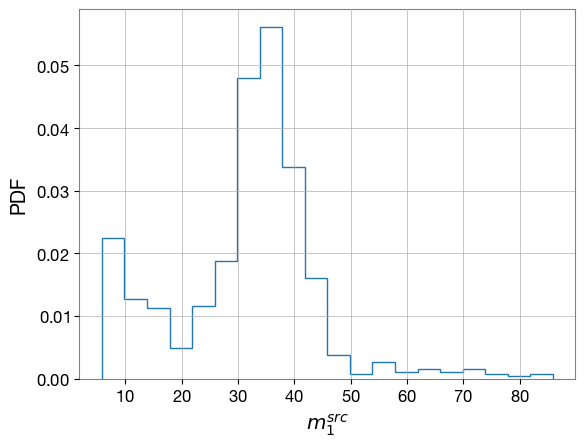

In [23]:
plt.hist(data['mass_1_source'], histtype='step', density=True, bins=20)
plt.xlabel(r'$m_1^{src}$')
plt.ylabel('PDF')
plt.show()

In [24]:
# detectable lensed events
f = open ('lensed_params_detectable.json', "r")
data = json.loads(f.read())

data.keys()

dict_keys(['zl', 'zs', 'sigma', 'q', 'e1', 'e2', 'gamma1', 'gamma2', 'Dl', 'Ds', 'Dls', 'theta_E', 'gamma', 'mass_1', 'mass_2', 'mass_1_source', 'mass_2_source', 'luminosity_distance', 'iota', 'psi', 'phase', 'geocent_time', 'ra', 'dec', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'n_images', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'weights', 'opt_snr_net', 'L1', 'H1', 'V1'])

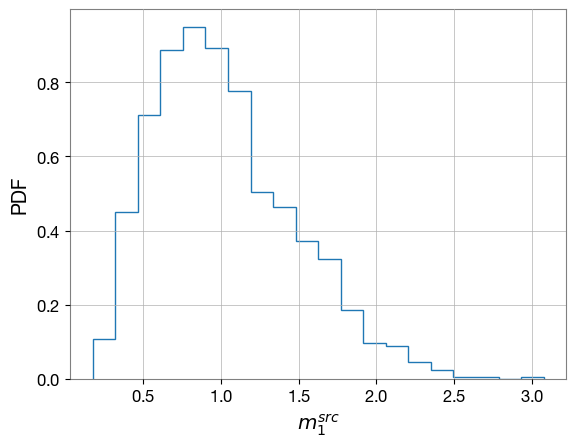

In [25]:
plt.hist(np.log10(np.array(data['magnifications']).flatten()), histtype='step', density=True, bins=20)
plt.xlabel(r'$m_1^{src}$')
plt.ylabel('PDF')
plt.show()